## 1. Exploratory Data Analysis the Tariff data

In [60]:
# Load neccessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
%matplotlib inline
from datetime import datetime

In [61]:
# Custom date function
dateparse = lambda x: pd.datetime.strptime(x, '%b-%y')

# Load the import value data from China, Asean and Vietnam to US between 01/2016 and 12/2019
# The data was downloaded from https://usatrade.census.gov/
df1 = pd.read_csv('d:/git/InSightProject/data/raw/Total import by CAVM.csv', skiprows=5,
                  parse_dates=["Time"], date_parser=dateparse, thousands=',')
df1.head()

C:\Users\nvduy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


,Time,China,Mexico,Vietnam,ASEAN
0,2016-01-01,37126434120,22337723342,3167752425,11636951006
1,2016-02-01,36066892525,23121746528,3448125637,12070812282
2,2016-03-01,29812326908,24692111632,3308419901,13384850175
3,2016-04-01,32920204539,24985773651,2995067822,12304945644
4,2016-05-01,37513726589,24761062479,3249979702,13359723861


In [62]:
# Reshape trade data for visualization
df1 = df1.melt(id_vars=['Time'], var_name='Country', value_name='Import_Value')
df1.head()

,Time,Country,Import_Value
0,2016-01-01,China,37126434120
1,2016-02-01,China,36066892525
2,2016-03-01,China,29812326908
3,2016-04-01,China,32920204539
4,2016-05-01,China,37513726589


In [63]:
# Convert trade values to log transformation to dectect changes between months better
df1['IHS_Import_Value'] = np.log2(df1['Import_Value'])

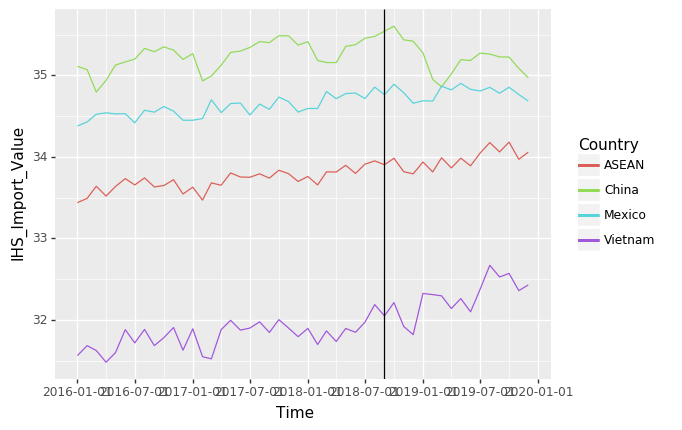

<ggplot: (-9223371910124177832)>

In [64]:
# Draw the time trend among countries
(ggplot(df1) + geom_line(aes(x='Time', y='IHS_Import_Value', color='Country')) + geom_vline(xintercept=pd.to_datetime('2018-09-01')))

We see that there is a clear dip for China and a slight jump for Vietnam log import values into the US after the implementation of tariff around September 2018. This is the average trend, how it is differently for each type of business?

## 2. China case in depth

### 2.1. Process Harmonized Coded import products (HTS)

In [65]:
# Loading the raw import dataset from  https://usatrade.census.gov at HTS 10 digits level.
import_cn = pd.read_csv('d:/git/InSightProject/data/raw/Vietnam - Monthly since 2016 - HS10.csv', thousands=',')
import_cn.tail()

,Commodity,Jan-16,Feb-16,Mar-16,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,...,Mar-19,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19
30384,9818000700 Equip/pts Repaired In Foreign Cty O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30385,9999001000 Equipment And Repairs Of Civil Airc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30386,"9999001500 Equipment And Repairs Of Vessels, N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30387,9999002000 Dutiable Mdse Fr Vessel Sunk 2 Yr I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30388,9999950000 Estimated Imports Of Low Valued Tra...,6808870.0,7006355.0,6900231.0,7283004.0,7620273.0,7562552.0,7504136.0,8384004.0,7533089.0,...,11926578.0,11816830.0,12117311.0,11803935.0,13299384.0,13728556.0,12245311.0,13946774.0,12600326.0,12626487.0


In [66]:
# Create HTS10 and HTS8 digit level product groups from the Commodity description and delete the original column
import_cn['hts10'] = import_cn.Commodity.str.slice(0,10)

import_cn['hts8'] = import_cn.Commodity.str.slice(0,8)

In [67]:
# Drop unneccessary columns
import_cn.drop(['Commodity','Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'], inplace=True, axis=1)

In [68]:
# Create a boolean mask for numeric columns
numeric_mask = (import_cn.dtypes == 'float64')

# Get list of numeric column names
numeric_columns = import_cn.columns[numeric_mask].tolist()

# Apply log transformation to numeric columns
import_cn[numeric_columns] = import_cn[numeric_columns].apply(lambda x: np.log2(x))

# Print the tail of the log transformed columns
print(import_cn[numeric_columns].tail())

          Jan-16     Feb-16     Mar-16     Apr-16     May-16     Jun-16  \
30384        NaN        NaN        NaN        NaN        NaN        NaN   
30385        NaN        NaN        NaN        NaN        NaN        NaN   
30386        NaN        NaN        NaN        NaN        NaN        NaN   
30387        NaN        NaN        NaN        NaN        NaN        NaN   
30388  22.698984  22.740233  22.718213  22.796102  22.861411  22.850442   

          Jul-16     Aug-16    Sep-16     Oct-16  ...     Nov-18     Dec-18  \
30384        NaN        NaN       NaN        NaN  ...        NaN        NaN   
30385        NaN        NaN       NaN        NaN  ...        NaN        NaN   
30386        NaN        NaN       NaN        NaN  ...        NaN        NaN   
30387        NaN        NaN       NaN        NaN  ...        NaN        NaN   
30388  22.839255  22.999208  22.84481  22.924753  ...  23.547784  23.350993   

          Jan-19     Feb-19     Mar-19    Apr-19     May-19     Jun-19  \


In [69]:
# Fill NAs values with 0
import_cn = import_cn.fillna(0)
import_cn.shape

(30389, 46)

### 2.2. Process China tariff data

In [70]:
# Load the China tariffs schedule obtained from https://hts.usitc.gov/
tariffhts10 = pd.read_csv('d:/git/InSightProject/data/raw/tariff schedule hts10.csv')
tariffhts10.head()

,hts10,subchapter
0,2931.90.9010,9903.88.04
1,2931.90.9021,9903.88.04
2,2931.90.9025,9903.88.04
3,2931.90.9029,9903.88.04
4,2931.90.9051,9903.88.16


In [71]:
# Create the hts8 column
tariffhts10['hts8'] = tariffhts10['hts10'].str.slice(0,10)

# Then drop the hts10 column
tariffhts10.drop('hts10', axis=1)

,subchapter,hts8
0,9903.88.04,2931.90.90
1,9903.88.04,2931.90.90
2,9903.88.04,2931.90.90
3,9903.88.04,2931.90.90
4,9903.88.16,2931.90.90
...,...,...
65,9903.88.04,9403.70.80
66,9903.88.16,9403.70.80
67,9903.88.04,9403.70.80
68,9903.88.04,9403.70.80


In [72]:
# Reorde the column hts8 so that it can be concatenated later
tariffhts10 = tariffhts10[['hts8', 'subchapter']]

In [73]:
# Load the China tariffs schedule obtained from https://hts.usitc.gov/
tariffhts8 = pd.read_csv('d:/git/InSightProject/data/raw/tariff schedule hts8.csv')

In [74]:
# Concatenate two tariff schedules
tariffhts8 = pd.concat([tariffhts10, tariffhts8])

In [75]:
# Drop the dot notation in hts and subchapter
tariffhts8['hts8'] = tariffhts8['hts8'].str.replace('.', '')
tariffhts8['subchapter'] = tariffhts8['subchapter'].str.replace('.', '')

In [76]:
# Drop duplicate rows after merging
tariffhts8.drop_duplicates(subset='hts8', inplace=True)
tariffhts8.shape

(10639, 2)

### 2.3. Merge tariff schedule to import dataset and create treated and control product groups

In [77]:
# Join tariff schedule to the import data
import_cn = import_cn.merge(tariffhts8, how='left', on='hts8')

In [78]:
# We will denote the product groups that do not have to incurr tariff as 9903.88.99
# Hence the control group will be 9903.88.15, 9903.88.16 and 9903.88.99
import_cn['subchapter'] = import_cn.subchapter.fillna(99038899)

In [79]:
# Convert subchapter column to numeric to perform comparison later
import_cn['subchapter'] = import_cn.subchapter.astype('int32')

In [80]:
# Let see the distribution of our control (99038899, 99038816, 99038815) and treatment groups (all other)
import_cn.subchapter.value_counts()

99038899    10451
99038803     9843
99038815     6725
99038801     1787
99038816     1086
99038802      457
99038804       40
Name: subchapter, dtype: int64

In [81]:
# Create Treated column based on tariff schedule
import_cn['Treated'] = [0 if x in [99038899,99038816,99038815] else 1 for x in import_cn['subchapter']]

In [82]:
# Recheck the distribution of treatment and control groups
import_cn.Treated.value_counts()

0    18262
1    12127
Name: Treated, dtype: int64

In [83]:
# Create TreatedTime column to signal when tariff begin to take effect
import_cn.loc[import_cn['subchapter']==99038801, 'TreatedTime'] = 'Jul-18'
import_cn.loc[import_cn['subchapter']==99038802, 'TreatedTime'] = 'Aug-18'
import_cn.loc[(import_cn['subchapter']==99038803)|(import_cn['subchapter']==99038804), 'TreatedTime'] = 'Sep-18'
import_cn.loc[(import_cn['subchapter']==99038815)|(import_cn['subchapter']==99038816)|(import_cn['subchapter']==99038899), 'TreatedTime'] = 'Feb-20'

In [84]:
# Recheck the distribution of TreatedTime column
import_cn.TreatedTime.value_counts()

Feb-20    18262
Sep-18     9883
Jul-18     1787
Aug-18      457
Name: TreatedTime, dtype: int64

In [85]:
import_cn.tail()

,Jan-16,Feb-16,Mar-16,Apr-16,May-16,Jun-16,Jul-16,Aug-16,Sep-16,Oct-16,...,Apr-19,May-19,Jun-19,Jul-19,Aug-19,hts10,hts8,subchapter,Treated,TreatedTime
30384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,9818000700,98180007,99038899,0,Feb-20
30385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,9999001000,99990010,99038899,0,Feb-20
30386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,9999001500,99990015,99038899,0,Feb-20
30387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,9999002000,99990020,99038899,0,Feb-20
30388,22.698984,22.740233,22.718213,22.796102,22.861411,22.850442,22.839255,22.999208,22.84481,22.924753,...,23.49434,23.530566,23.492765,23.664856,23.710677,9999950000,99999500,99038899,0,Feb-20


### 2.4. Reshape the data for econometrics methods

In [86]:
# Reshape wide to long by time columns, rename to Months and use import value as measurement value
import_cn_long = import_cn.melt(id_vars=['hts10', 'hts8', 'subchapter', 'Treated', 'TreatedTime'], var_name='Month', value_name='Ln_IV')
import_cn_long.head()

,hts10,hts8,subchapter,Treated,TreatedTime,Month,Ln_IV
0,0101100010,01011000,99038899,0,Feb-20,Jan-16,0.0
1,0101100020,01011000,99038899,0,Feb-20,Jan-16,0.0
2,0101110010,01011100,99038899,0,Feb-20,Jan-16,0.0
3,0101110020,01011100,99038899,0,Feb-20,Jan-16,0.0
4,0101190010,01011900,99038899,0,Feb-20,Jan-16,0.0


In [87]:
# Convert the time column to correct format
import_cn_long['TreatedTime'] = pd.to_datetime(import_cn_long['TreatedTime'], format='%b-%y')
import_cn_long['Month'] = pd.to_datetime(import_cn_long['Month'], format='%b-%y')

In [88]:
# Create TreatedLevel to distinguish before and after the tariff take effect only for the Treated group
import_cn_long.loc[import_cn_long['TreatedTime']>import_cn_long['Month'], 'TreatedLevel'] = 0
import_cn_long.loc[import_cn_long['TreatedTime']<=import_cn_long['Month'], 'TreatedLevel'] = 1

In [89]:
# Create Untreatedlevel column to signal before and after 'Sep-18' of control group
import_cn_long.loc[import_cn_long['Month']<datetime(2018, 9, 1) , 'UntreatedLevel'] = 0
import_cn_long.loc[import_cn_long['Month']>=datetime(2018, 9, 1) , 'UntreatedLevel'] = 1

In [90]:
# Sort the data according to hts10 product type and import mont
import_cn_long.sort_values(by=['hts10', 'Month'], inplace=True)

In [91]:
import_cn_long = import_cn_long.reset_index().drop('index', axis=1)

In [92]:
import_cn_long.head()

,hts10,hts8,subchapter,Treated,TreatedTime,Month,Ln_IV,TreatedLevel,UntreatedLevel
0,0101100010,01011000,99038899,0,2020-02-01,2016-01-01,0.0,0.0,0.0
1,0101100010,01011000,99038899,0,2020-02-01,2016-02-01,0.0,0.0,0.0
2,0101100010,01011000,99038899,0,2020-02-01,2016-03-01,0.0,0.0,0.0
3,0101100010,01011000,99038899,0,2020-02-01,2016-04-01,0.0,0.0,0.0
4,0101100010,01011000,99038899,0,2020-02-01,2016-05-01,0.0,0.0,0.0


In [93]:
# Create an annual lag of import value to prepare for deseasonalizing the trend
import_cn_long['lag12_ln_IV'] = import_cn_long.groupby('hts10')['Ln_IV'].shift(12)

In [94]:
# Create the 12 months differences of the ln import value
import_cn_long['dln_IV'] = import_cn_long['Ln_IV'] - import_cn_long['lag12_ln_IV']

In [95]:
import_cn_long.tail()

,hts10,hts8,subchapter,Treated,TreatedTime,Month,Ln_IV,TreatedLevel,UntreatedLevel,lag12_ln_IV,dln_IV
1337111,9999950000,99999500,99038899,0,2020-02-01,2019-04-01,23.494340,0.0,1.0,23.324648,0.169692
1337112,9999950000,99999500,99038899,0,2020-02-01,2019-05-01,23.530566,0.0,1.0,23.379721,0.150845
1337113,9999950000,99999500,99038899,0,2020-02-01,2019-06-01,23.492765,0.0,1.0,23.407987,0.084778
1337114,9999950000,99999500,99038899,0,2020-02-01,2019-07-01,23.664856,0.0,1.0,23.296683,0.368173
1337115,9999950000,99999500,99038899,0,2020-02-01,2019-08-01,23.710677,0.0,1.0,23.336534,0.374142


### 2.5. Convert panel data to cross-sectional for ML techniques

In [96]:
# Create the pre_treated average for each hts10 product
pre_treated_avg = import_cn_long.loc[(import_cn_long['Treated']==1)&(import_cn_long['TreatedLevel']==0.0)].groupby('hts10')['dln_IV'].mean().reset_index()
pre_treated_avg.shape

(12127, 2)

In [97]:
# Create the post_treated average for each hts10 product
post_treated_avg = import_cn_long.loc[(import_cn_long['Treated']==1)&(import_cn_long['TreatedLevel']==1.0)].groupby('hts10')['dln_IV'].mean().reset_index()
post_treated_avg.shape

(12127, 2)

In [98]:
# Create the pre_untreated average for each hts10 product
pre_untreated_avg = import_cn_long.loc[(import_cn_long['Treated']==0)&(import_cn_long['UntreatedLevel']==0.0)].groupby('hts10')['dln_IV'].mean().reset_index()
pre_untreated_avg.shape

(18262, 2)

In [99]:
# Create the post_untreated average for each hts10 product
post_untreated_avg = import_cn_long.loc[(import_cn_long['Treated']==0)&(import_cn_long['UntreatedLevel']==1.0)].groupby('hts10')['dln_IV'].mean().reset_index()
post_untreated_avg.shape

(18262, 2)

In [100]:
# Create the pre and post average dataset
pre_avg = pre_treated_avg.append(pre_untreated_avg)
post_avg = post_treated_avg.append(post_untreated_avg)
pre_avg.shape, post_avg.shape

((30389, 2), (30389, 2))

In [101]:
# Merge the pre and post average into a complete dataset
cross_import_cn = pre_avg.merge(post_avg, how='inner', on='hts10', sort=True, suffixes=['_pre','_post'])

In [102]:
# Create the difference column between the pre and post average of annual different log transformed import value
cross_import_cn['crossiv'] = cross_import_cn.dln_IV_post - cross_import_cn.dln_IV_pre
cross_import_cn.tail()

,hts10,dln_IV_pre,dln_IV_post,crossiv
30384,9818000700,0.000000,0.000000,0.000000
30385,9999001000,0.000000,0.000000,0.000000
30386,9999001500,0.000000,0.000000,0.000000
30387,9999002000,0.000000,0.000000,0.000000
30388,9999950000,0.233467,0.245464,0.011997


In [103]:
# Merge back the original processed columns to the new dataset
temp = import_cn[['hts10', 'hts8', 'subchapter', 'Treated', 'TreatedTime']]
cross_import_cn = cross_import_cn.merge(temp, how='inner', on='hts10', sort=True)
cross_import_cn.tail()

,hts10,dln_IV_pre,dln_IV_post,crossiv,hts8,subchapter,Treated,TreatedTime
30384,9818000700,0.000000,0.000000,0.000000,98180007,99038899,0,Feb-20
30385,9999001000,0.000000,0.000000,0.000000,99990010,99038899,0,Feb-20
30386,9999001500,0.000000,0.000000,0.000000,99990015,99038899,0,Feb-20
30387,9999002000,0.000000,0.000000,0.000000,99990020,99038899,0,Feb-20
30388,9999950000,0.233467,0.245464,0.011997,99999500,99038899,0,Feb-20


### 2.6. Merging NAICS covariates (business features)

In [104]:
# Load translation data, note that this translation data will have duplicate hs10 and naic 6 due to other deleted column like sit...
translation = pd.read_excel('d:/git/InSightProject/data/raw/translation.xlsx', dtype={'hts10': np.object, 'naics': np.object})
translation.head()

,hts10,naics
0,9102114540,334518
1,0304202026,NaN
2,0304202030,NaN
3,1605102010,311711
4,0304202040,NaN


In [105]:
# Keep only distinct rows of translation dataset
translation.drop_duplicates(inplace=True)
translation.shape

(56011, 2)

In [106]:
# Left join translation to trade dataset
cross_import_cn = cross_import_cn.merge(translation, how='left', on='hts10')

In [107]:
cross_import_cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54819 entries, 0 to 54818
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hts10        54819 non-null  object 
 1   dln_IV_pre   54819 non-null  float64
 2   dln_IV_post  54819 non-null  float64
 3   crossiv      54819 non-null  float64
 4   hts8         54819 non-null  object 
 5   subchapter   54819 non-null  int32  
 6   Treated      54819 non-null  int64  
 7   TreatedTime  54819 non-null  object 
 8   naics        33837 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 4.0+ MB


In [108]:
# Not all naics match with hs, there are a few NA values in naics column, let keep only non-NA naics value so that it can match with ASM later
cross_import_cn.dropna(inplace=True)
cross_import_cn.shape

(33837, 9)

In [109]:
# Load pre-process Annual Survey of Manufacture dataset
asm = pd.read_csv('d:/git/InSightProject/data/cleaned/asm_impute.csv', dtype={'naics':np.object})
asm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   naics        362 non-null    object 
 1   va_y         362 non-null    float64
 2   va_l         362 non-null    float64
 3   pl_l         362 non-null    float64
 4   inter_y      362 non-null    float64
 5   sk_l         362 non-null    float64
 6   m_l          362 non-null    float64
 7   k_l          362 non-null    float64
 8   rental_l     362 non-null    float64
 9   temp_l       362 non-null    float64
 10  it_l         362 non-null    float64
 11  mkt_l        362 non-null    float64
 12  outsource_l  362 non-null    float64
 13  tax_l        362 non-null    float64
dtypes: float64(13), object(1)
memory usage: 39.7+ KB


In [110]:
# Load and process MNC related-party dataset for China
rpchina = pd.read_csv('d:/git/InSightProject/data/raw/NAICS Related Party Database-relatedparty_import_from_VN_2016.csv',dtype={'naics':np.object})
trpchina = pd.read_csv('d:/git/InSightProject/data/raw/NAICS Related Party Database-Totalimport_from_VN_2016.csv',dtype={'naics':np.object})
vn_mnc = trpchina.merge(rpchina, on='naics')
vn_mnc.head()

,naics,COUNTRY_x,year_x,imp_tot,COUNTRY_y,year_y,imp_rel
0,111219,5520,2016,6179022,5520,2016,736817
1,111335,5520,2016,920765919,5520,2016,8796935
2,111339,5520,2016,467208713,5520,2016,104895238
3,111910,5520,2016,303362,5520,2016,198000
4,111930,5520,2016,206728,5520,2016,5000


In [111]:
# Create cn_mnc_ratio and drop other columns
vn_mnc['vn_mnc_ratio'] = vn_mnc.imp_rel/vn_mnc.imp_tot
vn_mnc = vn_mnc[['naics', 'vn_mnc_ratio']]

In [112]:
# Merge cn_mnc to asm dataset and fill NAs with 0 to indicate some industry have 0 mnc_ratio
asm = asm.merge(vn_mnc, how='left', on='naics')

asm.fillna(0, inplace=True)

asm.head()

,naics,va_y,va_l,pl_l,inter_y,sk_l,m_l,k_l,rental_l,temp_l,it_l,mkt_l,outsource_l,tax_l,vn_mnc_ratio
0,311111,-0.752601,6.421681,-0.317195,-0.024491,-1.302647,2.449652,-0.336388,-3.285013,-2.495423,-3.997700,-2.677568,-3.033526,-3.154557,0.000000
1,311119,-1.504628,5.563609,-0.541129,-0.042811,-0.872490,2.880728,-0.862711,-2.573232,-3.168018,-3.886732,-4.018013,-3.318718,-3.310029,0.000000
2,311211,-1.053974,5.889352,-0.455922,-0.014667,-1.004748,2.469446,-0.875183,-2.632601,-3.321441,-4.245402,-4.147852,-3.443941,-3.285021,0.000000
3,311212,-1.126887,5.385971,-0.437481,-0.012581,-1.037500,2.260338,-1.252142,-2.915592,-2.580165,-2.800505,-2.343190,-1.697319,-3.173979,0.011177
4,311213,-1.051066,6.342587,-0.484698,-0.092009,-0.956808,2.727762,-0.546413,-2.212999,-3.368445,-1.449408,0.975635,-0.340500,-2.349692,0.000000


In [113]:
# Left join asm to the import dataset
cross_import_cn = cross_import_cn.merge(asm, how='left', on='naics')

In [114]:
# Since our asm only cover naics 31-33, we will subset trade data to this subset
cross_import_cn.dropna(axis=0, subset=['va_y'], how='any', inplace=True)
cross_import_cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22339 entries, 138 to 33828
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hts10         22339 non-null  object 
 1   dln_IV_pre    22339 non-null  float64
 2   dln_IV_post   22339 non-null  float64
 3   crossiv       22339 non-null  float64
 4   hts8          22339 non-null  object 
 5   subchapter    22339 non-null  int32  
 6   Treated       22339 non-null  int64  
 7   TreatedTime   22339 non-null  object 
 8   naics         22339 non-null  object 
 9   va_y          22339 non-null  float64
 10  va_l          22339 non-null  float64
 11  pl_l          22339 non-null  float64
 12  inter_y       22339 non-null  float64
 13  sk_l          22339 non-null  float64
 14  m_l           22339 non-null  float64
 15  k_l           22339 non-null  float64
 16  rental_l      22339 non-null  float64
 17  temp_l        22339 non-null  float64
 18  it_l          22339 non-

In [115]:
cross_import_cn.head()

,hts10,dln_IV_pre,dln_IV_post,crossiv,hts8,subchapter,Treated,TreatedTime,naics,va_y,...,sk_l,m_l,k_l,rental_l,temp_l,it_l,mkt_l,outsource_l,tax_l,vn_mnc_ratio
138,0201100510,0.0,0.0,0.0,02011005,99038815,0,Feb-20,311611,-1.544506,...,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0
139,0201100590,0.0,0.0,0.0,02011005,99038815,0,Feb-20,311611,-1.544506,...,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0
140,0201101010,0.0,0.0,0.0,02011010,99038815,0,Feb-20,311611,-1.544506,...,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0
141,0201101090,0.0,0.0,0.0,02011010,99038815,0,Feb-20,311611,-1.544506,...,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0
142,0201105010,0.0,0.0,0.0,02011050,99038815,0,Feb-20,311611,-1.544506,...,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0


In [116]:
# final check is there any NAs
cross_import_cn.isnull().sum()

hts10           0
dln_IV_pre      0
dln_IV_post     0
crossiv         0
hts8            0
subchapter      0
Treated         0
TreatedTime     0
naics           0
va_y            0
va_l            0
pl_l            0
inter_y         0
sk_l            0
m_l             0
k_l             0
rental_l        0
temp_l          0
it_l            0
mkt_l           0
outsource_l     0
tax_l           0
vn_mnc_ratio    0
dtype: int64

In [117]:
# Save the wide and long dataset to use in other modules
# cross_import_cn.to_csv('d:/git/InSightProject/data/processed/cross_import_cn.csv')
# import_cn_long.to_csv('d:/git/InSightProject/data/processed/import_cn_long.csv')

## 3. Heterogeneous Effects

In [118]:
import pandas as pd
import numpy as np
import patsy
from sklearn import linear_model, ensemble, base, neural_network
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nvduy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.


In [119]:
df = cross_import_cn
df.describe()

,dln_IV_pre,dln_IV_post,crossiv,subchapter,Treated,va_y,va_l,pl_l,inter_y,sk_l,m_l,k_l,rental_l,temp_l,it_l,mkt_l,outsource_l,tax_l,vn_mnc_ratio
count,22339.000000,22339.000000,22339.000000,2.233900e+04,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000,22339.000000
mean,0.105908,0.188726,0.082818,9.903883e+07,0.486280,-0.765741,5.235061,-0.563899,-0.065739,-0.940600,1.314980,-1.669089,-2.829446,-3.147202,-3.791495,-4.221808,-3.135600,-3.653872,0.202805
std,1.623039,1.828053,2.558642,3.707669e+01,0.499823,0.266860,0.665646,0.265544,0.066703,0.337997,0.621135,0.820405,0.495975,0.490225,0.448915,1.333613,0.552054,0.598682,0.251526
min,-17.286960,-23.841997,-33.129007,9.903880e+07,0.000000,-2.179501,3.949419,-1.719706,-0.487980,-2.021572,-0.529979,-4.461288,-4.645673,-5.632467,-5.523981,-8.122415,-4.905344,-5.367595,0.000000
25%,0.000000,0.000000,0.000000,9.903880e+07,0.000000,-0.899575,4.740170,-0.661467,-0.081517,-1.214721,0.847871,-2.284702,-3.123158,-3.513314,-4.078738,-5.341651,-3.548167,-4.021853,0.017688
50%,0.000000,0.000000,0.000000,9.903882e+07,0.000000,-0.706041,5.176343,-0.526193,-0.051411,-0.893673,1.266652,-1.798012,-2.860337,-3.207065,-3.758476,-4.201254,-3.131604,-3.830509,0.105807
75%,0.000000,0.000000,0.000000,9.903882e+07,1.000000,-0.588269,5.663485,-0.352104,-0.031469,-0.725863,1.746423,-0.958660,-2.482652,-2.765253,-3.511000,-3.277221,-2.751551,-3.307397,0.279630
max,17.018620,24.831660,26.056949,9.903890e+07,1.000000,-0.117046,7.997239,-0.142079,0.784118,-0.197377,4.092062,1.882042,-1.498568,-1.479487,-1.449408,0.975635,-0.340500,-1.421266,0.999462


In [123]:
df.columns

Index(['hts10', 'dln_IV_pre', 'dln_IV_post', 'crossiv', 'hts8', 'subchapter',
       'Treated', 'TreatedTime', 'naics', 'va_y', 'va_l', 'pl_l', 'inter_y',
       'sk_l', 'm_l', 'k_l', 'rental_l', 'temp_l', 'it_l', 'mkt_l',
       'outsource_l', 'tax_l', 'vn_mnc_ratio'],
      dtype='object')

In [124]:
# some data prep for later
formula = """
crossiv ~ Treated + va_y+ va_l+ pl_l+ inter_y+ sk_l+ m_l+ k_l+ rental_l+ temp_l+ it_l+ mkt_l+ outsource_l+ tax_l+ vn_mnc_ratio
"""

In [125]:
# Describing statistical models and for building design matrices.
crossiv, X = patsy.dmatrices(formula, df, return_type='dataframe')
X = X.loc[:,:]
crossiv = crossiv.iloc[:,0]

In [126]:
X.head()

,Intercept,Treated,va_y,va_l,pl_l,inter_y,sk_l,m_l,k_l,rental_l,temp_l,it_l,mkt_l,outsource_l,tax_l,vn_mnc_ratio
138,1.0,0.0,-1.544506,4.896185,-0.22293,-0.010004,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0
139,1.0,0.0,-1.544506,4.896185,-0.22293,-0.010004,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0
140,1.0,0.0,-1.544506,4.896185,-0.22293,-0.010004,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0
141,1.0,0.0,-1.544506,4.896185,-0.22293,-0.010004,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0
142,1.0,0.0,-1.544506,4.896185,-0.22293,-0.010004,-1.610292,2.526679,-1.77365,-3.426187,-3.771032,-5.523981,-3.95376,-3.504538,-4.444634,0.0


In [127]:
treatment_variable = "Treated"
treatment = X["Treated"]

In [128]:
Xl = X.drop(["Intercept", "Treated"], axis=1)

In [129]:
hts_id = df.loc[X.index, "hts8"].astype("category")

In [130]:
# Estimate average treatment effects
from statsmodels.iolib.summary2 import summary_col
tmp = pd.DataFrame(dict(crossiv=crossiv,treatment=treatment))
tariff_impact= smf.ols("crossiv ~ treatment", data=tmp).fit(cov_type="cluster", cov_kwds={'groups':hts_id})
summary_col(tariff_impact)

,crossiv
Intercept,0.0698
,(0.0344)
treatment,0.0268
,(0.0443)
R-squared,-0.0000
,0.0000


In [131]:
# for clustering standard errors
def get_treatment_se(fit, cluster_id, rows=None):
    if cluster_id is not None:
        if rows is None:
            rows = [True] * len(cluster_id)
        vcov = sm.stats.sandwich_covariance.cov_cluster(fit, cluster_id.loc[rows])
        return np.sqrt(np.diag(vcov))

    return fit.HC0_se

In [132]:
def generic_ml_model(x, y, treatment, model, n_split=10, n_group=5, cluster_id=None):
    nobs = x.shape[0]

    blp = np.zeros((n_split, 2))
    blp_se = blp.copy()
    gate = np.zeros((n_split, n_group))
    gate_se = gate.copy()

    baseline = np.zeros((nobs, n_split))
    cate = baseline.copy()
    lamb = np.zeros((n_split, 2))

    for i in range(n_split):
        main = np.random.rand(nobs) > 0.5
        rows1 = ~main & (treatment == 1)
        rows0 = ~main & (treatment == 0)

        mod1 = base.clone(model).fit(x.loc[rows1, :], (y.loc[rows1]))
        mod0 = base.clone(model).fit(x.loc[rows0, :], (y.loc[rows0]))

        B = mod0.predict(x)
        S = mod1.predict(x) - B
        baseline[:, i] = B
        cate[:, i] = S
        ES = S.mean()

        ## BLP
        # assume P(treat|x) = P(treat) = mean(treat)
        p = treatment.mean()
        reg_df = pd.DataFrame(dict(
            y=y, B=B, treatment=treatment, S=S, main=main, excess_S=S-ES
        ))
        reg = smf.ols("y ~ B + I(treatment-p) + I((treatment-p)*(S-ES))", data=reg_df.loc[main, :])
        reg_fit = reg.fit()
        blp[i, :] = reg_fit.params.iloc[2:4]
        blp_se[i, :] = get_treatment_se(reg_fit, cluster_id, main)[2:]

        lamb[i, 0] = reg_fit.params.iloc[-1]**2 * S.var()

        ## GATEs
        cutoffs = np.quantile(S, np.linspace(0,1, n_group + 1))
        cutoffs[-1] += 1
        for k in range(n_group):
            reg_df[f"G{k}"] = (cutoffs[k] <= S) & (S < cutoffs[k+1])

        g_form = "y ~ B + " + " + ".join([f"I((treatment-p)*G{k})" for k in range(n_group)])
        g_reg = smf.ols(g_form, data=reg_df.loc[main, :])
        g_fit = g_reg.fit()
        gate[i, :] = g_fit.params.values[2:] #g_fit.params.filter(regex="G").values
        gate_se[i, :] = get_treatment_se(g_fit, cluster_id, main)[2:]

        lamb[i, 1] = (gate[i,:]**2).sum()/n_group

    out = dict(
        gate=gate, gate_se=gate_se,
        blp=blp, blp_se=blp_se,
        Lambda=lamb, baseline=baseline, cate=cate,
        name=type(model).__name__
    )
    return out


def generic_ml_summary(generic_ml_output):
    out = {
        x: np.nanmedian(generic_ml_output[x], axis=0)
        for x in ["blp", "blp_se", "gate", "gate_se", "Lambda"]
    }
    out["name"] = generic_ml_output["name"]
    return out

In [133]:
kw = dict(x=Xl, treatment=treatment, n_split=11, n_group=5, cluster_id=hts_id)

In [134]:
@ignore_warnings(category=ConvergenceWarning)
def evaluate_models(models, y, **other_kw):
    all_kw = kw.copy()
    all_kw["y"] = y
    all_kw.update(other_kw)
    return list(map(lambda x: generic_ml_model(model=x, **all_kw), models))

In [135]:
def generate_report(results):
    summaries = list(map(generic_ml_summary, results))
    df_plot = pd.DataFrame({
        mod["name"]: np.median(mod["cate"], axis=1)
        for mod in results
    })

    print("Correlation in median CATE:")
    display(df_plot.corr())
    sns.pairplot(df_plot, diag_kind="kde", kind="reg")

    print("\n\nBest linear projection of CATE")
    df_cate = pd.concat({
        s["name"]: pd.DataFrame(dict(blp=s["blp"], se=s["blp_se"]))
        for s in summaries
    }).T.stack()
    display(df_cate)

    print("\n\nGroup average treatment effects:")
    df_groups = pd.concat({
        s["name"]: pd.DataFrame(dict(gate=s["gate"], se=s["gate_se"]))
        for s in summaries
    }).T.stack()
    display(df_groups)

In [136]:
import xgboost as xgb
models = [
    linear_model.LassoCV(cv=10, n_alphas=25, max_iter=500, tol=1e-4, n_jobs=1),
    ensemble.RandomForestRegressor(n_estimators=200, min_samples_leaf=20),
    xgb.XGBRegressor(n_estimators=200, max_depth=3, reg_lambda=2.0, reg_alpha=0.0, objective="reg:squarederror"),
    neural_network.MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=500, activation="logistic",
                                solver="adam", tol=1e-3, early_stopping=True, alpha=0.0001)
]

In [137]:
results = evaluate_models(models, y=crossiv)

Correlation in median CATE:


,LassoCV,RandomForestRegressor,XGBRegressor,MLPRegressor
LassoCV,1.000000,0.222580,0.190834,-0.206680
RandomForestRegressor,0.222580,1.000000,0.761215,-0.148243
XGBRegressor,0.190834,0.761215,1.000000,-0.117872
MLPRegressor,-0.206680,-0.148243,-0.117872,1.000000




Best linear projection of CATE


LassoCV  RandomForestRegressor  XGBRegressor  MLPRegressor
blp 0  2.185311e-02               0.022491      0.033089      0.003115
    1  1.103708e-18               0.486012      0.264556      3.904196
se  0  5.573118e-02               0.052890      0.055338      0.055944
    1  4.662292e-01               0.150063      0.074920      5.063626



Group average treatment effects:


LassoCV  RandomForestRegressor  XGBRegressor  MLPRegressor
gate 0  0.000000              -0.253800     -0.218887     -0.004251
     1  0.007177              -0.078917      0.080075     -0.060885
     2 -0.118150              -0.029713     -0.072606      0.018509
     3  0.028914               0.061195     -0.000146     -0.026906
     4  0.082854               0.275658      0.262639      0.021033
se   0  0.120200               0.133356      0.162524      0.105347
     1  0.144725               0.103054      0.116232      0.122916
     2  0.097349               0.088914      0.068063      0.124926
     3  0.104681               0.090518      0.101801      0.132961
     4  0.108471               0.157722      0.153797      0.128805

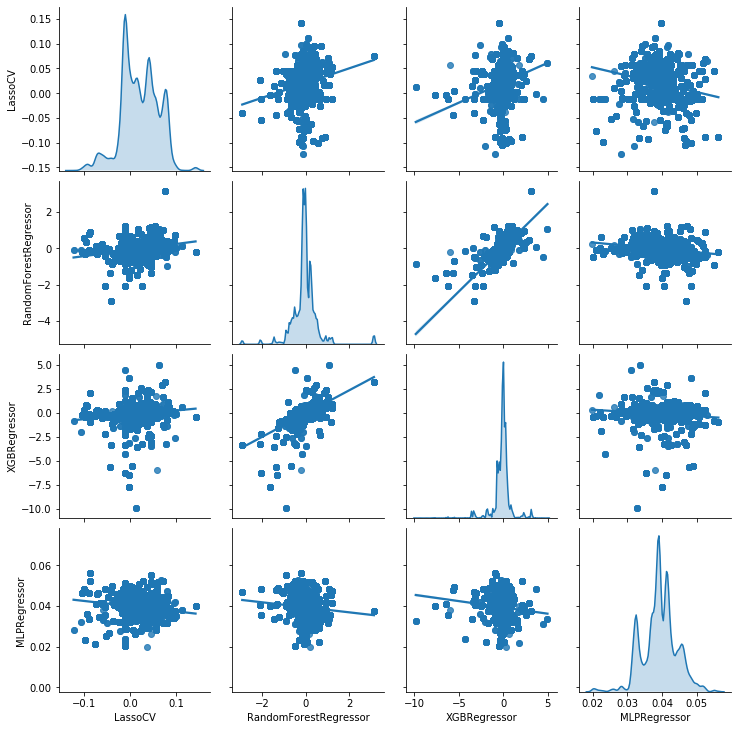

In [138]:
generate_report(results)

## 4. Covariate Means by Group

In [139]:
X.columns

Index(['Intercept', 'Treated', 'va_y', 'va_l', 'pl_l', 'inter_y', 'sk_l',
       'm_l', 'k_l', 'rental_l', 'temp_l', 'it_l', 'mkt_l', 'outsource_l',
       'tax_l', 'vn_mnc_ratio'],
      dtype='object')

In [146]:
variables = ['va_y', 'va_l', 'pl_l', 'inter_y', 'sk_l',
       'm_l', 'k_l', 'rental_l', 'temp_l', 'it_l', 'mkt_l', 'outsource_l',
       'tax_l', 'vn_mnc_ratio']

In [147]:
def cov_mean_by_group(y, res, cluster_id):
    n_group = res["gate"].shape[1]
    gate = res["gate"].copy()
    gate_se = gate.copy()
    dat = y.to_frame()

    for i in range(res["cate"].shape[1]):
        S = res["cate"][:, i]
        cutoffs = np.quantile(S, np.linspace(0, 1, n_group+1))
        cutoffs[-1] += 1
        for k in range(n_group):
            dat[f"G{k}"] = ((cutoffs[k] <= S) & (S < cutoffs[k+1])) * 1.0

        g_form = "y ~ -1 + " + " + ".join([f"G{k}" for k in range(n_group)])
        g_reg = smf.ols(g_form, data=dat.astype(float))
        g_fit = g_reg.fit()
        gate[i, :] = g_fit.params.filter(regex="G").values
        rows = ~y.isna()
        gate_se[i, :] = get_treatment_se(g_fit, cluster_id, rows)

    out = pd.DataFrame(dict(
        mean=np.nanmedian(gate, axis=0),
        se=np.nanmedian(gate_se, axis=0),
        group=list(range(n_group))
    ))

    return out

In [148]:
def compute_group_means_for_results(results):
    to_cat = []
    for res in results:
        for v in variables:
            to_cat.append(
                cov_mean_by_group(df[v], res, hts_id)
                .assign(method=res["name"], variable=v)
            )

    group_means = pd.concat(to_cat, ignore_index=True)
    group_means["plus2sd"] = group_means.eval("mean + 1.96*se")
    group_means["minus2sd"] = group_means.eval("mean - 1.96*se")
    return group_means

In [149]:
group_means = compute_group_means_for_results(results)

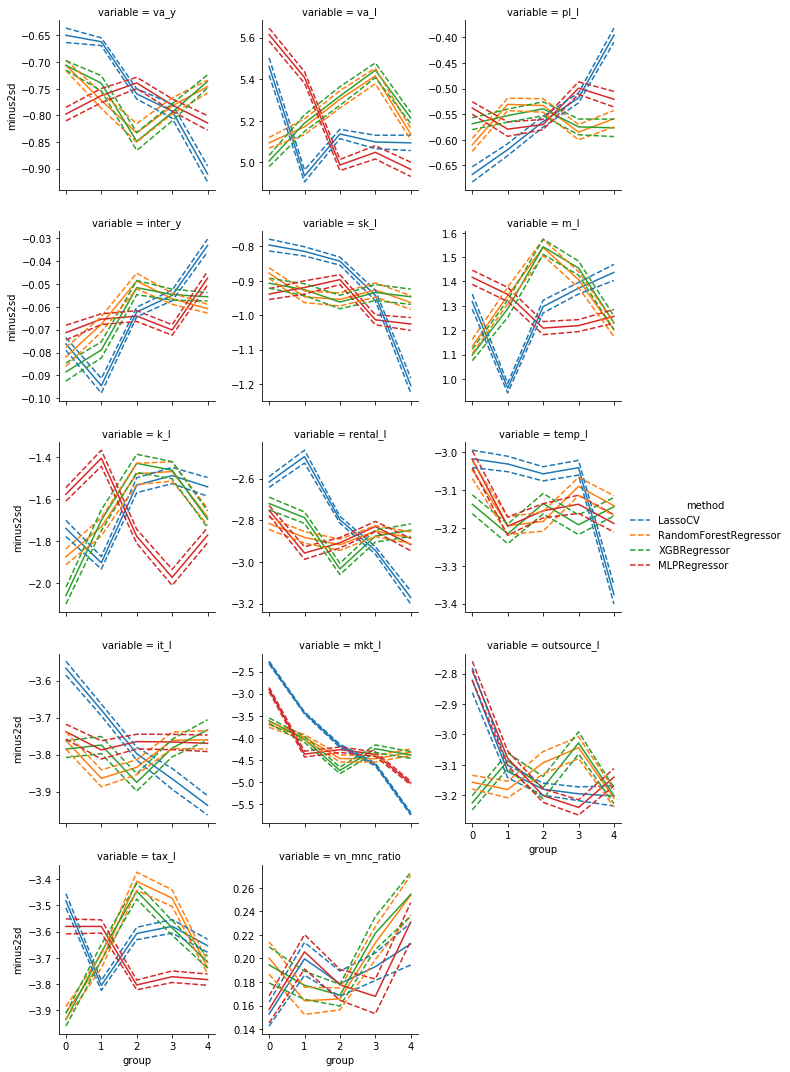

In [150]:
g = sns.FacetGrid(group_means, col="variable", col_wrap=3, hue="method", sharey=False)
g.map(plt.plot, "group", "mean")
g.map(plt.plot, "group", "plus2sd", ls="--")
g.map(plt.plot, "group", "minus2sd", ls="--")
g.add_legend();